In [7]:
import sys
sys.path.append('../src')

import json
import os
from config import DATASET_DIR
from visual import plot_distribution
from utils import get_class_distribution

Training set class distribution:
Counter({'elliptical': 9371, 'spiral barred': 4355, 'spiral': 3668, 'spiral edge-on': 3082, 'artifact': 35})
Validation set class distribution:
Counter({'elliptical': 2635, 'spiral barred': 1318, 'spiral': 1025, 'spiral edge-on': 875, 'artifact': 7})
Test set class distribution:
Counter({'elliptical': 1307, 'spiral barred': 629, 'spiral': 536, 'spiral edge-on': 453, 'artifact': 6})


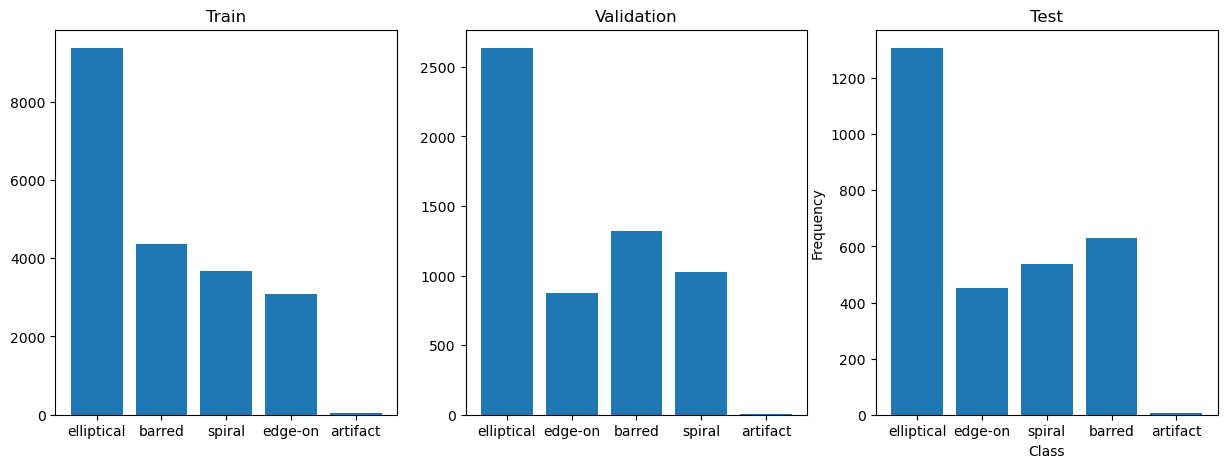

In [14]:
with open(os.path.join(DATASET_DIR, 'galaxy_train.json'), 'r') as file:
    train_data = json.load(file)

with open(os.path.join(DATASET_DIR, 'galaxy_val.json'), 'r') as file:
    val_data = json.load(file)

with open(os.path.join(DATASET_DIR, 'galaxy_test.json'), 'r') as file:
    test_data = json.load(file)


# Get class distributions for each split
train_distribution = get_class_distribution(train_data)
val_distribution = get_class_distribution(val_data)
test_distribution = get_class_distribution(test_data)

# Print the distributions
print("Training set class distribution:")
print(train_distribution)

print("Validation set class distribution:")
print(val_distribution)

print("Test set class distribution:")
print(test_distribution)

# Plot the distributions
plot_distribution([train_distribution, val_distribution, test_distribution], ['Train', "Validation", 'Test'])
